## LCS Player Analysis

### Stats to look into for every player
- This split's VODS:
    - Their positioning tendencies
    - Thier warding patterns
    - Rewatch TL Kay's videos again to see what to get
    - Thier picks
    - Rewatch some analysis videos
    
- Overall    
    - Stats that he provided vs other players (worlds, lcs, etc.)
        - Averages for everything + graphs
        

Kays comment:

```
First thing I would do is create a portfolio of work for a specific team. This can include, but not limited to, build calculations, databases, international regional reports, in depth jungle analysis, scouting reports, etc
```

In [180]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

### Importing data

In [3]:
spring2020 = pd.read_excel('./data/2020/2020-spring-match-data.xlsx')  # February 17

spring2019 = pd.read_excel('./data/2019/2019-spring-match-data.xlsx')
summer2019 = pd.read_excel('./data/2019/2019-summer-match-data.xlsx')
worlds2019 = pd.read_excel('./data/2019/2019-worlds-match-data.xlsx')

spring2018 = pd.read_excel('./data/2018/2018-spring-match-data.xlsx')
summer2018 = pd.read_excel('./data/2018/2018-summer-match-data.xlsx')
worlds2018 = pd.read_excel('./data/2018/2018-worlds-match-data.xlsx')

In [4]:
# Aggregate into one giant file
data = spring2020
excel_files = [spring2019, summer2019, worlds2019, spring2018, summer2018, worlds2018]
for e in excel_files:
    data = data.append(e,sort=False)

In [5]:
len(data)

62892

In [6]:
### Replace NALCS and EULCS with LCS/LEC
data = data.replace(['NALCS', 'EULCS'], ['LCS', 'LEC'])

In [193]:
# Take out Worlds and MSI data
overall = data[~data.league.isin(['WC', 'MSI'])]

# Only include overall for LCS
overall = overall[overall['league'] == 'LCS']

In [194]:
def parseDate(excel_date):
    def floatHourToTime(fh):
        h, r = divmod(fh, 1)
        m, r = divmod(r*60, 1)
        return (
            int(h),
            int(m),
            int(r*60),
        )

    dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + int(excel_date) - 2)
    hour, minute, second = floatHourToTime(excel_date % 1)
    return dt.replace(hour=hour, minute=minute, second=second).date()

In [195]:
overall['date'] = overall['date'].replace(r'^\s*$', np.nan, regex=True)

overall = overall[overall['date'].notna()]

overall['date'] = overall['date'].map(parseDate)

### Overall Average Player Stats

The data will exclude worlds and msi data

- Average K,D,A 
    - By Player + Result + Patch + Per Game
    - By Region + Result + Patch
    - By Position + Result + Patch
    - By Champion + Result + Patch

In [199]:
mean_num_games_per_player = int(overall.groupby(['player']).count().gameid.mean())
print(f'Avg Number of games per player {mean_num_games_per_player}')

Avg Number of games per player 55


In [200]:
# Add kda column
overall['KDA'] = (overall['k'] + overall['a']) / overall['d'].replace([0,1])

In [201]:
rp = ['result', 'patchno','k','d','a', 'KDA']
player_rp = overall[rp+['player']]

player_rp['Patch Number'] = player_rp['patchno'].astype(str).str.split('.', expand=True)[0]

# Remove any column with nulls. Turns out 12 are from patchno and 24 are from some ranodm 8.16 games that don't matter too much
player_rp.dropna(inplace=True)

player_rp['Patch Number'] = player_rp['Patch Number'].astype(int)

In [203]:
mean_playrp = player_rp.groupby(['result', 'Patch Number', 'player']).mean().reset_index()

In [208]:
dl = mean_playrp[mean_playrp.player == "Doublelift"]

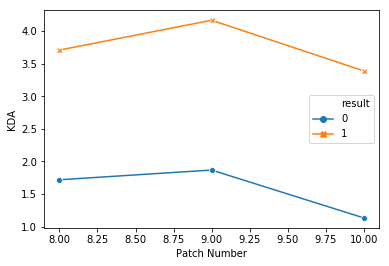

In [112]:
sns.lineplot(x='Patch Number', y="KDA", data=add, markers=True, dashes=False, err_style="bars", hue="result", style="result")

In [216]:
# History of KDA per match with a line to indicate the career average in these past two years
dl = overall[overall.player=='Doublelift'].sort_values(by='date')

In [244]:
def getRunningMeanKDA():
    win_sum, lose_sum = 0, 0
    count = 0
    res_win = []
    res_lose = []
    for kda, res in zip(dl['KDA'], dl['result']):
        count += 1
        run_sum += float(kda)
        if res == 1:
            res_win.append(round(run_sum/count, 2))
            res_lose.append(res_lose[-1])
        else:
            res_lose.append(round(run_sum/count, 2))
    return res_win, res_lose
    

In [246]:
dl['running_mean_win_kda'], dl['running_mean_lose_kda'] = getRunningMeanKDA()

ValueError: Length of values does not match length of index

D:\Users\aznro\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


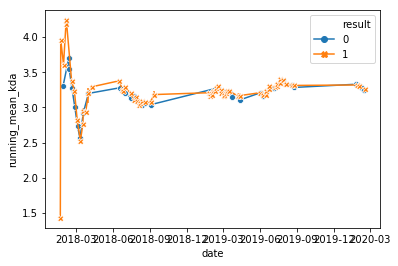

In [242]:
sns.lineplot(x='date', y="running_mean_kda", data=dl, markers=True, dashes=False, err_style="bars", hue="result", style="result")

In [ ]:
def getOverallStats(player_name):
    

### Stats that I will look into for every player

- Players avg kda over past two years vs his kda right now as well as his k,d,a separately

### Team Liquid

#### Doublelift

In [13]:
doublelift = overall[overaell.player == 'Doublelift']

NameError: name 'overaell' is not defined

In [6]:
doublelift.league.value_counts()

LCS      62
NALCS    55
MSI      31
WC       12
Name: league, dtype: int64

In [7]:
doublelift.drop(['gameid', 'league', 'split', 'date',], axis=1, inplace=True)

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,herald,heraldtime
548,1270555,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2020-1,43855.7,1,1,10.01,9,Red,...,3524.0,-391.0,86.0,95.0,-9.0,127.0,140.0,-13.0,NaN,NaN
735,1271104,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2020-1,43857.9,1,3,10.01,4,Blue,...,2938.0,-179.0,81.0,73.0,8.0,135.0,119.0,16.0,NaN,NaN
920,1291426,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2020-1,43862.7,2,1,10.02,9,Red,...,3137.0,-87.0,87.0,90.0,-3.0,142.0,126.0,16.0,NaN,NaN
951,1291748,https://matchhistory.na.leagueoflegends.com/en...,LCS,2020-1,43863.6,2,2,10.02,4,Blue,...,3017.0,724.0,94.0,77.0,17.0,145.0,132.0,13.0,NaN,NaN
1520,1304374,https://matchhistory.na.leagueoflegends.com/en...,LCS,2020-1,43869.7,3,1,10.02,9,Red,...,3075.0,599.0,88.0,84.0,4.0,146.0,146.0,0.0,NaN,NaN
1671,1295383,https://matchhistory.na.leagueoflegends.com/en...,LCS,2020-1,43871.8,3,3,10.02,4,Blue,...,3481.0,-516.0,73.0,97.0,-24.0,120.0,149.0,-29.0,NaN,NaN
2175,1281254,https://matchhistory.na.leagueoflegends.com/en...,LCS,2020-1,43876.7,4,1,10.03,4,Blue,...,3002.0,417.0,101.0,81.0,20.0,148.0,136.0,12.0,NaN,NaN
2300,1281549,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2020-1,43877.7,4,2,10.03,9,Red,...,3053.0,195.0,91.0,72.0,19.0,149.0,109.0,40.0,NaN,NaN
1083,992625,https://matchhistory.euw.leagueoflegends.com/e...,LCS,2019-1,43491.7,1,1,9.01,4,Blue,...,3260.0,413.0,92.0,80.0,12.0,147.0,122.0,25.0,0.0,NaN
1419,992872,https://matchhistory.euw.leagueoflegends.com/e...,LCS,2019-1,43492.7,1,2,9.01,4,Blue,...,3162.0,163.0,91.0,87.0,4.0,145.0,148.0,-3.0,1.0,NaN
